### Importing all needed Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import simplefilter
simplefilter('ignore')
from scipy.sparse.linalg import svds
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Loading the Dataset

In [2]:
df=pd.read_csv('ratings_electronics.csv',header=None)
df.head()

,0,1,2,3
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [3]:
### Adding the column names
df.columns=['userId','productId','rating','timestamp']
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [4]:
### Dropping the Timestamp column
df.drop('timestamp',axis=1,inplace=True)

### Exploratory Data Analysis

In [5]:
print(df.shape)
print()
print('This dataset has {} Rows and {} columns'.format(df.shape[0],df.shape[1]))

(1048576, 3)

This dataset has 1048576 Rows and 3 columns


In [6]:
df=df.iloc[:50000,0:]

- since the dataset is big , we have considered only with 50k Rows and 3 columns

In [7]:
### Reduced dataset
df.shape

(50000, 3)

### Datatype informations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
userId       50000 non-null object
productId    50000 non-null object
rating       50000 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [9]:
### changing the datatype of rating to float
df['rating']=df['rating'].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
userId       50000 non-null object
productId    50000 non-null object
rating       50000 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


### Checking for any missing values

In [11]:
df.isna().sum()

userId       0
productId    0
rating       0
dtype: int64

In [12]:
df.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [13]:
### 5 Point summary Details for Rating columns
df.describe()

,rating
count,50000.00000
mean,4.03524
std,1.35555
min,1.00000
25%,4.00000
50%,5.00000
75%,5.00000
max,5.00000


In [14]:
df['userId'].describe()

count              50000
unique             46554
top       A231WM2Z2JL0U3
freq                  37
Name: userId, dtype: object

In [15]:
df['productId'].describe()

count          50000
unique          3446
top       B00001P4ZH
freq            2075
Name: productId, dtype: object

### Printing the unique value count in each columns

In [16]:
print('Unique UserID count :',df['userId'].nunique() )
print('Unique ProductID count :',df['productId'].nunique() )
print('Unique Rating count :',df['rating'].nunique() )

Unique UserID count : 46554
Unique ProductID count : 3446
Unique Rating count : 5


### Datatypes of each columns

In [17]:
df.dtypes

userId        object
productId     object
rating       float64
dtype: object

#### Unique users and Products Count

In [18]:
print('Total no of unique Users:',df['userId'].nunique())
print('Total no of unique Products:',df['productId'].nunique())

Total no of unique Users: 46554
Total no of unique Products: 3446


### Pairplotting the dataframe

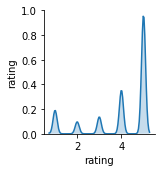

In [19]:
sns.pairplot(df,diag_kind='kde')

 - Thus from above graph we could see that rating '5' has high distributions comparing other ratings

In [20]:
df1=df.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)
df1.head()

productId,059400232X,089933623X,094339676X,1034385789,1039869017,1085901386,1094441252,1182702627,1254875778,132793040,...,B00004THQ7,B00004THQE,B00004THXT,B00004THXV,B00004TISI,B00004TIZS,B00004TIZT,B00004TIZW,B00004TJ0G,B00004TJ0L
userId,,,,,,,,,,,,,,,,,,,,,
A001944026UMZ8T3K5QH1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00766851QZZUBOVF4JFT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01255851ZO1U93P8RKGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A014623426J5CM7M12MBW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01580702BRW77PSJ9X34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
### Grouping by UserID
df_usr_grp=df.groupby(['userId'])

In [22]:
### Grouping by rating
df_rat_grp=df.groupby(['rating'])

In [23]:
### Grouping by ProductID
df_prod_grp=df.groupby(['productId'])

#### Count for each ratings

In [24]:
df_rat_grp['rating'].count()

rating
1.0     5468
2.0     2784
3.0     3927
4.0    10160
5.0    27661
Name: rating, dtype: int64

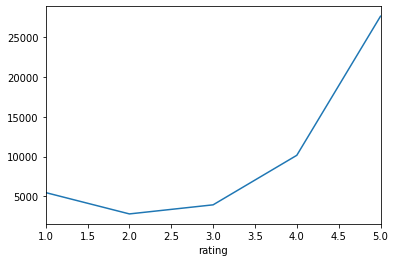

In [25]:
df_rat_grp['rating'].count().plot()

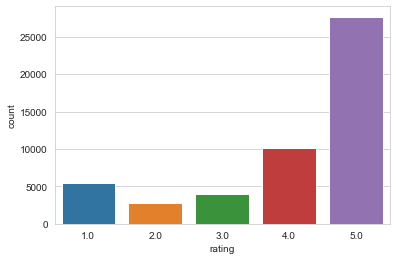

In [26]:
sns.set_style(style='whitegrid')
sns.countplot(data=df,x='rating')

### Product that got more ratings

In [27]:
most_rated_product=df.groupby(['productId']).size().sort_values(ascending=False)[:10]

In [28]:
most_rated_product

productId
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
972683275     1051
B00004SABB    1030
B00004SB92    1006
B00004THCZ     820
B00001P4XA     579
1400532655     484
B00000K2YR     457
dtype: int64

### Users who rated more ratings

In [29]:
more_rated_user=df.groupby(['userId']).size().sort_values(ascending=False)[:10]

In [30]:
more_rated_user

userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
A1RPTVW5VEOSI     17
A1ISUNUWG0K02V    16
A1MJMYLRTZ76ZX    16
A23ZO1BVFFLGHO    15
A7Y6AVS576M03     15
dtype: int64

#### we will consider the users who have rated more than 20 products

In [31]:
counts=df['userId'].value_counts()
df_final=df[df['userId'].isin(counts[counts>=15].index)]
df_final.head()

,userId,productId,rating
3050,ALUNVOQRXOZIA,1400599997,1.0
8100,AY8Q1X7G96HV5,B00000DM9M,5.0
8979,A1RPTVW5VEOSI,B00000J061,5.0
9098,AY8Q1X7G96HV5,B00000J08C,5.0
9220,ALUNVOQRXOZIA,B00000J0A2,4.0


In [32]:
df_final.shape

(219, 3)

- And we considered users who have rated more than 4 products

### Splitting the dataset into train and test data

In [33]:
train_set,test_set=train_test_split(df_final,test_size=0.2)

In [34]:
train_grouped=train_set.groupby(['productId']).agg({'userId':'count'}).reset_index()
train_grouped.rename(columns={'userId':'score'},inplace=True)
train_grouped.head()

,productId,score
0,B00000DM9M,1
1,B00000J08C,1
2,B00000J0E8,1
3,B00000J1US,1
4,B00000J3H5,1


In [35]:
train_sorted=train_grouped.sort_values(['score','productId'],ascending=[0,1])
train_sorted['rank']=train_sorted['score'].rank(method='first',ascending=False)
#train_sorted.head()
popular_recommendations=train_sorted.head(7)

In [36]:
def recommend(user_id):
    user_recommendations=popular_recommendations
    user_recommendations['user_id']=user_id
    cols=user_recommendations.columns.tolist()
    cols=cols[-1:]+cols[:-1]
    user_recommendations=user_recommendations[cols]
    return user_recommendations
    

In [37]:
recommend(1)

,user_id,productId,score,rank
94,1,B00004RC2D,5,1.0
115,1,B00004SB92,4,2.0
64,1,B00002SWHH,3,3.0
6,1,B00000J3II,2,4.0
17,1,B00000JBIA,2,5.0
18,1,B00000JBJQ,2,6.0
24,1,B00000JHVP,2,7.0


In [38]:
recommend(3)

,user_id,productId,score,rank
94,3,B00004RC2D,5,1.0
115,3,B00004SB92,4,2.0
64,3,B00002SWHH,3,3.0
6,3,B00000J3II,2,4.0
17,3,B00000JBIA,2,5.0
18,3,B00000JBJQ,2,6.0
24,3,B00000JHVP,2,7.0


### Popularity Recommendation Systems Summary

#### Hence we have implemented Popularity recommendation system,where all users gets same products as recommended items no matter whoever the user is.

### Implementing collabrative Filtering Recommendation Model

#### pivoting the matrix into required format

In [39]:
df_prod_ratings=df_final.pivot(index='userId',columns='productId',values='rating').fillna(0)

In [40]:
df_prod_ratings.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [41]:
df_final.columns

Index(['userId', 'productId', 'rating'], dtype='object')

In [42]:
print(df_prod_ratings.shape)

(11, 186)


In [43]:
given_no_of_ratigs=np.count_nonzero(df_prod_ratings)
possible_ratings=df_prod_ratings.shape[0]*df_prod_ratings.shape[1]
density=(given_no_of_ratigs)/(possible_ratings)
print('given_no_of_ratigs :',given_no_of_ratigs)
print('possible_ratings :',possible_ratings)
print('Density :',np.round(density,4)*100,'%')

given_no_of_ratigs : 219
possible_ratings : 2046
Density : 10.7 %


In [44]:
df_prod_ratings['user_index']=np.arange(0,df_prod_ratings.shape[0])
df_prod_ratings.set_index(['user_index'],inplace=True)

In [45]:
df_prod_ratings.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


### Using SVD ( single value decomposition )

In [46]:
u,sigma,vT=svds(df_prod_ratings,k=10)

In [47]:
sigma=np.diag(sigma)

In [48]:
all_user_predicted_ratings=np.dot(np.dot(u,sigma),vT)

In [49]:
pred_df=pd.DataFrame(all_user_predicted_ratings,columns=df_prod_ratings.columns)

In [50]:
pred_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
0,-0.005077,-0.010023,0.219864,-0.010023,-0.020310,-0.006562,2.962929,0.026594,4.938216,4.938216,...,-0.025387,0.026594,0.026594,0.219864,0.021275,-0.008018,-0.006014,-0.008018,0.026594,-0.008018
1,-0.000261,-0.000515,0.011300,-0.000515,-0.001044,-0.000337,-0.001905,0.001367,-0.003176,-0.003176,...,-0.001305,0.001367,0.001367,0.011300,0.001093,-0.000412,-0.000309,-0.000412,0.001367,-0.000412
2,-0.016300,-0.032177,0.705839,-0.032177,-0.065201,-0.021066,-0.119009,0.085374,-0.198349,-0.198349,...,-0.081502,0.085374,0.085374,0.705839,0.068299,-0.025742,-0.019306,-0.025742,0.085374,-0.025742
3,0.018068,0.035667,4.217599,0.035667,0.072274,0.023351,0.131918,-0.094635,0.219864,0.219864,...,0.090342,-0.094635,-0.094635,4.217599,-0.075708,0.028534,0.021400,0.028534,-0.094635,0.028534
4,0.002185,0.004314,-0.094635,0.004314,0.008742,0.002824,0.015956,4.988553,0.026594,0.026594,...,0.010927,4.988553,4.988553,-0.094635,3.990843,0.003451,0.002588,0.003451,4.988553,0.003451


In [51]:
def recommendation(userID,df_prod_ratings,pred_df,recommendation_count):
    user_idx=userID-1
    sorted_user_ratings=df_prod_ratings.iloc[user_idx].sort_values(ascending=False)
    sorted_user_predictions=pred_df.iloc[user_idx].sort_values(ascending=False)
    temp=pd.concat([sorted_user_ratings,sorted_user_predictions],axis=1)
    temp.index.name='Recommended Items'
    temp.columns=['user_ratings','user_predictions']
    temp=temp.loc[temp.user_ratings==0]
    temp=temp.sort_values('user_predictions',ascending=False)
    print('\n Below are the recommended Items for the user :{}'.format(userID))
    print(temp.head(recommendation_count))

#### checking recommendations for given users

In [52]:
userID=5
recommendation_count=5
recommendation(userID,df_prod_ratings,pred_df,recommendation_count)


 Below are the recommended Items for the user :5
                   user_ratings  user_predictions
Recommended Items                                
B00004T1WX                  0.0          0.184667
B00000J4ER                  0.0          0.184667
B00001P4XA                  0.0          0.184667
B00004T1WZ                  0.0          0.184667
B00000JYLO                  0.0          0.184667


In [53]:
userID=8
recommendation_count=5
recommendation(userID,df_prod_ratings,pred_df,recommendation_count)


 Below are the recommended Items for the user :8
                   user_ratings  user_predictions
Recommended Items                                
B00000J061                  0.0          1.526746
B00003WGP5                  0.0          1.526746
B00004TH2W                  0.0          1.526746
B00004RERZ                  0.0          1.526746
B00004RIPE                  0.0          1.526746


### Collaborative Recommended Systems Summary

#### Thus we have implemented User specific recommendations systems based on users past purchase history.

### Evaluating the prediction using RMSE metric

In [54]:
df_prod_ratings.mean().head()

productId
1400599997    0.090909
B00000DM9M    0.454545
B00000J061    0.454545
B00000J08C    0.454545
B00000J0A2    0.363636
dtype: float64

In [55]:
pred_df.mean().head()

productId
1400599997    0.088513
B00000DM9M    0.449816
B00000J061    0.558292
B00000J08C    0.449816
B00000J0A2    0.354053
dtype: float64

In [56]:
rmse_df=pd.concat([df_prod_ratings.mean(),pred_df.mean()],axis=1)
rmse_df.columns=['Avg_actual_ratings','Avg_predicted_ratings']
rmse_df['item_index']=np.arange(0,rmse_df.shape[0],1)
rmse_df.head()

,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
1400599997,0.090909,0.088513,0
B00000DM9M,0.454545,0.449816,1
B00000J061,0.454545,0.558292,2
B00000J08C,0.454545,0.449816,3
B00000J0A2,0.363636,0.354053,4


In [57]:
RMSE=round(((rmse_df.Avg_actual_ratings-rmse_df['Avg_predicted_ratings'])**2).mean()**0.5,5)

In [58]:
print('RMSE :',RMSE)
print('MAE  :',mean_absolute_error(rmse_df['Avg_actual_ratings'],rmse_df['Avg_predicted_ratings']))
print('MSE  :',mean_squared_error(rmse_df['Avg_actual_ratings'],rmse_df['Avg_predicted_ratings']))

RMSE : 0.05854
MAE  : 0.034857051552597516
MSE  : 0.0034271344119146943


### Conclusion

- Hence we have implemented both popularity based recommended system and user collabrative recommended systems.
- Out of which we could use Popularity based model when we don't have enough user product purchase history.
- Once we got enough product purchase history data,Its good we use collabrative Filtering Recommendations systems.